# <center> INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS

## <center> BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

***Importing the necessary libraries***

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the processed data csv
data = pd.read_csv('../../data/processed.csv')

In [3]:
# checking the first five row
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PerformanceRating
0,0.404724,-1.566799,0.062776,-0.624920,0.341379,0.984227,0.171404,-0.022634,-0.351211,-2.460052,...,-0.537098,-0.191197,0.798081,-0.306391,-0.163976,-0.309941,-0.521089,1.158880,-0.117845,3
1,1.321330,-0.261231,1.226169,-0.480346,-0.416642,0.251381,-0.215952,-0.328429,-1.016511,-1.136806,...,-0.355752,0.878877,1.545028,-1.064916,-0.269057,-1.267522,-0.385328,0.488948,0.915439,3
2,3.455277,-1.107383,1.103412,0.460038,0.928282,0.829020,0.007258,0.425231,-1.211491,1.019294,...,0.075772,0.962154,0.798312,0.551033,-0.987944,-0.501521,-2.206193,0.945774,-0.338291,4
3,4.282261,0.327870,-0.050691,0.376033,0.914926,-0.127428,0.014658,0.390216,0.048888,0.560772,...,0.029186,-0.243086,-0.504021,0.546722,-0.985781,0.483801,1.668945,-1.161007,-1.429217,3
4,-0.130212,1.769232,2.960434,-0.198642,0.072143,-2.093763,-1.491856,-0.080168,-0.933596,-1.103752,...,-0.249758,0.213086,1.004729,-1.191812,-0.348876,-0.207522,-0.753639,-1.160292,0.950850,3


### Splitting the independent and dependent data

In [4]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [5]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,0.404724,-1.566799,0.062776,-0.624920,0.341379,0.984227,0.171404,-0.022634,-0.351211,-2.460052,...,0.171402,-0.537098,-0.191197,0.798081,-0.306391,-0.163976,-0.309941,-0.521089,1.158880,-0.117845
1,1.321330,-0.261231,1.226169,-0.480346,-0.416642,0.251381,-0.215952,-0.328429,-1.016511,-1.136806,...,-0.071941,-0.355752,0.878877,1.545028,-1.064916,-0.269057,-1.267522,-0.385328,0.488948,0.915439
2,3.455277,-1.107383,1.103412,0.460038,0.928282,0.829020,0.007258,0.425231,-1.211491,1.019294,...,1.564136,0.075772,0.962154,0.798312,0.551033,-0.987944,-0.501521,-2.206193,0.945774,-0.338291
3,4.282261,0.327870,-0.050691,0.376033,0.914926,-0.127428,0.014658,0.390216,0.048888,0.560772,...,-0.345806,0.029186,-0.243086,-0.504021,0.546722,-0.985781,0.483801,1.668945,-1.161007,-1.429217
4,-0.130212,1.769232,2.960434,-0.198642,0.072143,-2.093763,-1.491856,-0.080168,-0.933596,-1.103752,...,0.225960,-0.249758,0.213086,1.004729,-1.191812,-0.348876,-0.207522,-0.753639,-1.160292,0.950850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.829629,-1.481192,-0.282000,-1.342671,0.399700,2.202587,-0.730946,-0.388194,2.150698,0.329710,...,-0.089659,0.421134,0.088099,-0.204950,0.528068,0.160276,0.264070,0.092738,0.862103,-0.661257
1196,-2.448642,0.388947,0.113846,-1.645620,1.590839,0.397114,0.586942,-0.921674,-0.058193,-0.863360,...,-0.576404,-0.647716,-0.039123,1.675223,0.718394,1.640619,0.481563,0.237540,-0.370665,0.951718
1197,2.155389,-0.313296,-1.188419,0.157223,0.327357,1.801355,-2.312534,-0.972433,1.168511,-1.095900,...,-2.135515,-1.356616,0.080881,0.860440,0.006061,1.235612,0.072662,-1.061093,0.022116,2.037015
1198,1.267451,0.300784,-2.404937,0.466083,-1.841104,-0.043451,1.935274,0.002555,-0.461878,0.916050,...,-1.144435,0.289015,-0.857004,1.868095,-0.509620,-0.388898,-0.339399,0.521157,-0.726510,-0.077506


### Balancing the dataset

SMOTE (Synthetic Minority Over-sampling Technique)

In many classification problems, the number of instances in each class is not balanced. This can lead to a model that is biased towards the majority class, and it may perform poorly on the minority class.

SMOTE works by generating synthetic samples for the minority class. It does this by interpolating between existing minority class instances. The algorithm selects a minority class instance and its k-nearest neighbors. It then generates synthetic instances along the line segments connecting those neighbors.

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


## <span style="background-color: #DBFB10; padding: 5px;">Train test split

In [7]:
# importing train test split for traning and testing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=56)

In [8]:
# Shape of the training and testing dataset
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((2097, 22), (2097,), (525, 22), (525,))

------------------------------------------------------------------------

# <span style="background-color: #DBFB10; padding: 5px;"> Model Training

-  During training, the model learns the relationships between the features and the target variable. This involves iteratively adjusting its internal parameters to minimize the prediction error or maximize a chosen objective function.

- The optimization process typically involves techniques like gradient descent, which adjusts the model's parameters to minimize a loss function that quantifies the difference between predicted and actual values.

## <span style="background-color: #D32D41; padding: 5px;">1. LOGISTIC REGRESSION

In [9]:
# Importing the Important libraries
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression() # saving the model into the object variable

In [10]:
logistic_reg.fit(X_train, y_train) # training out model with the help of training data

LogisticRegression()

In [11]:
logistic_reg_prediction = logistic_reg.predict(X_test) # predicting our model with the help of testing data

### Model Evaluation

In [12]:
# Imporing the libraries 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
logistic_reg_acc_Score  = accuracy_score(y_test, logistic_reg_prediction) # checking the accuracy score of the model
logistic_reg_acc_Score

0.8228571428571428

In [13]:
# check for the training score of the model 
logistic_reg_training_score = logistic_reg.score(X_train, y_train) 
logistic_reg_training_score

0.8340486409155937

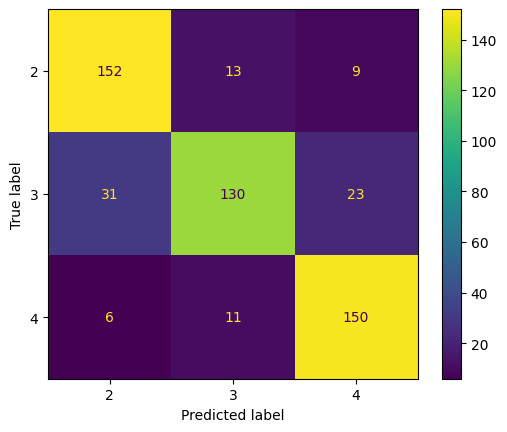

In [14]:
# Importing the libraries for displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(logistic_reg, X_test, y_test)
Logistic_Regression_Confusion_Matrix

In [15]:
# displaying the classification report of the Linear model 
print(classification_report(y_test, logistic_reg_prediction))

              precision    recall  f1-score   support

           2       0.80      0.87      0.84       174
           3       0.84      0.71      0.77       184
           4       0.82      0.90      0.86       167

    accuracy                           0.82       525
   macro avg       0.82      0.83      0.82       525
weighted avg       0.82      0.82      0.82       525



# <span style="background-color: #D32D41; padding: 5px;">2. K-Nearest Neighbor Classifier

In [16]:
# Importing the libraries
from sklearn.neighbors import KNeighborsClassifier
k_neigh_classifier = KNeighborsClassifier() # saving the model in object variable

In [17]:
k_neigh_classifier.fit(X_train, y_train) # training the model with the training data

KNeighborsClassifier()

In [18]:
k_neigh_class_predict = k_neigh_classifier.predict(X_test.values) # predicting the the model with the testing data
k_neigh_class_predict                                             # Here values is used due to the bug in the code while predicting the values 

array([4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       4, 3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4,
       4, 2, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 4, 3, 4, 4, 4, 3, 3, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 2, 3, 4, 3,
       4, 2, 3, 4, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2,
       4, 2, 4, 4, 3, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 4, 4, 4, 4, 3, 4, 2, 2, 2, 4, 4, 3, 2, 3, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 3, 4, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 3, 4, 3, 2, 2, 3, 2, 2, 2, 3, 2, 4, 3, 2, 2, 3, 4,
       2, 2, 2, 4, 4, 4, 2, 3, 2, 2, 2, 3, 3, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       3, 4, 2, 2, 3, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 2, 2, 4,
       2, 2, 4, 3, 2, 4, 4, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 4, 3, 4, 2, 3,
       2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       2, 3, 4, 4, 4, 2, 3, 3, 2, 2, 4, 3, 2, 2, 3,

### Model Evaluation

In [19]:
# importing the libraries for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
k_neigh_classifier_acc_Score  = accuracy_score(y_test, k_neigh_class_predict) # check for the accuracy score of the model
k_neigh_classifier_acc_Score

0.8038095238095239

In [20]:
k_neigh_classifier_training_score = k_neigh_classifier.score(X_train.values, y_train.values) # training score of the model
k_neigh_classifier_training_score

0.871244635193133

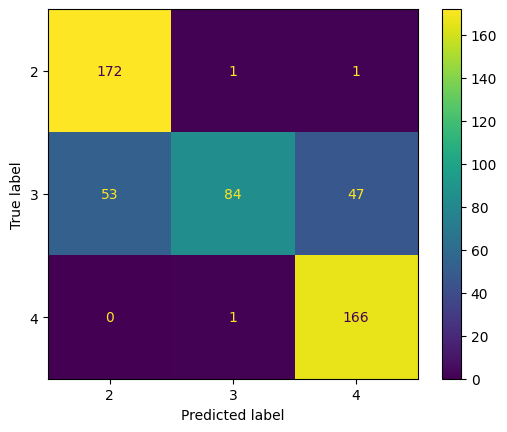

In [21]:
# Impoting the necessary libraries for displaying confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(k_neigh_classifier, X_test.values, y_test.values)
Logistic_Regression_Confusion_Matrix

In [22]:
print(classification_report(y_test,k_neigh_class_predict))

              precision    recall  f1-score   support

           2       0.76      0.99      0.86       174
           3       0.98      0.46      0.62       184
           4       0.78      0.99      0.87       167

    accuracy                           0.80       525
   macro avg       0.84      0.81      0.79       525
weighted avg       0.84      0.80      0.78       525



# <span style="background-color: #D32D41; padding: 5px;">3. Support Vector Classification

In [23]:
# Importing the necessary libraires
from sklearn.svm import SVC
svm_classifier = SVC()

In [24]:
svm_classifier.fit(X_train, y_train) # training the model with training data

SVC()

In [25]:
svm_classifier_predict = svm_classifier.predict(X_test) # predicitng the values with testing data
svm_classifier_predict

array([3, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 3, 3, 2, 2, 4,
       4, 3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4,
       4, 2, 3, 2, 2, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 4, 3, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 3, 4, 2, 3, 3, 2, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 3, 3,
       4, 3, 4, 4, 3, 2, 4, 4, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 4, 2, 4, 4, 4, 3, 4, 3, 4, 3, 2, 2, 4, 4, 2, 2, 3, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4,
       3, 2, 4, 3, 4, 3, 4, 3, 2, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3,
       2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 3, 3, 3, 4, 2, 4, 3, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 2, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 2, 3, 2, 2, 4, 3, 4, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 4, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evaluation

In [26]:
# importing the necessary library for model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_classifier_acc_score = accuracy_score(y_test, svm_classifier_predict)
svm_classifier_acc_score

0.9371428571428572

In [27]:
# check for the training score of the model
svm_classifier_training_score = svm_classifier.score(X_train, y_train)
svm_classifier_training_score

0.9752026704816404

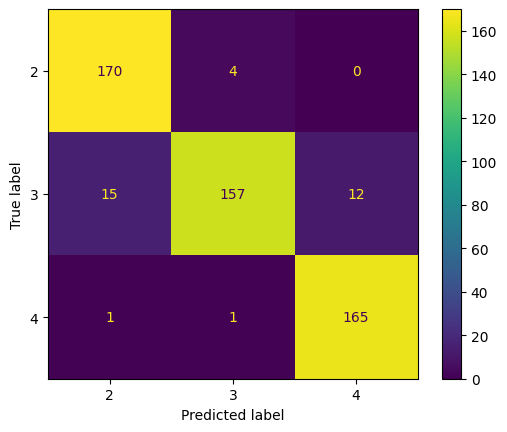

In [28]:
# imporing the necessaru libraires for displaing the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
svm_classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)
svm_classifier_Confusion_Matrix

In [29]:
# showing the classification report of the model
print(classification_report(y_test,k_neigh_class_predict))

              precision    recall  f1-score   support

           2       0.76      0.99      0.86       174
           3       0.98      0.46      0.62       184
           4       0.78      0.99      0.87       167

    accuracy                           0.80       525
   macro avg       0.84      0.81      0.79       525
weighted avg       0.84      0.80      0.78       525



# <span style="background-color: #D32D41; padding: 5px;">4. Decision Tree Classifier

In [30]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
dec_tree_classifier = DecisionTreeClassifier() # saving the model into the object variable

In [31]:
dec_tree_classifier.fit(X_train, y_train) # training the model with the help of training data

DecisionTreeClassifier()

In [32]:
# predicting the model with the help of testing data
dec_tree_classifier_prediction = dec_tree_classifier.predict(X_test)
dec_tree_classifier_prediction

array([3, 2, 2, 3, 4, 4, 2, 2, 2, 4, 2, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       3, 3, 3, 2, 2, 3, 4, 4, 4, 2, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 3,
       4, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4,
       3, 2, 2, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 2, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 2, 4, 2, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 4, 4, 2, 2, 4, 2, 3,
       4, 3, 4, 4, 3, 4, 4, 4, 2, 2, 4, 2, 3, 3, 2, 3, 2, 2, 2, 4, 3, 2,
       3, 4, 2, 4, 4, 4, 2, 4, 2, 4, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4, 4, 2,
       2, 2, 3, 2, 4, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 3, 4, 3, 4, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 3, 4, 2, 4, 3, 2, 4, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 2, 4, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 3, 2, 4,
       2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3,
       2, 2, 2, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 4, 3, 4,
       2, 3, 4, 3, 3, 3, 2, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evaluation

In [33]:
# importing the necessary library for model evalution
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# check for the model accuracy score
dec_tree_classifier_acc_score = accuracy_score(y_test, dec_tree_classifier_prediction)
dec_tree_classifier_acc_score

0.7923809523809524

In [34]:
# check for the training score of the model
dec_tree_classifier_training_score = dec_tree_classifier.score(X_train, y_train)
dec_tree_classifier_training_score

1.0

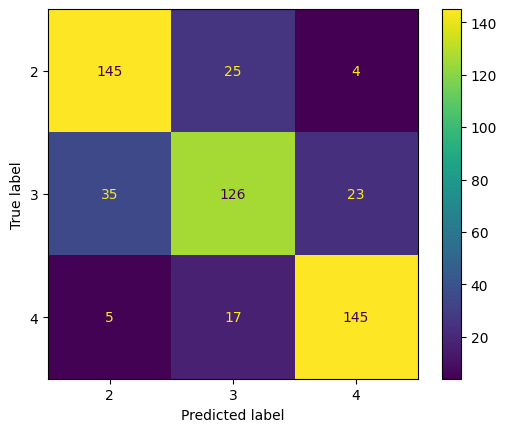

In [35]:
# importing the necessary library for displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
dec_tree_classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(dec_tree_classifier, X_test, y_test)
dec_tree_classifier_Confusion_Matrix

In [36]:
# Displaying the classification report of the model
print(classification_report(y_test, dec_tree_classifier_prediction))

              precision    recall  f1-score   support

           2       0.78      0.83      0.81       174
           3       0.75      0.68      0.72       184
           4       0.84      0.87      0.86       167

    accuracy                           0.79       525
   macro avg       0.79      0.80      0.79       525
weighted avg       0.79      0.79      0.79       525



# <span style="background-color: #D32D41; padding: 5px;">5. Random Forest Classification

In [37]:
# importing the necessary library 
from sklearn.ensemble import RandomForestClassifier

# saving the model into the object variable
rand_for_class = RandomForestClassifier()

In [38]:
# training the model with the training model 
rand_for_class.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# predicting the model with the help of testing data 
rand_for_class_predict = rand_for_class.predict(X_test)
rand_for_class_predict

array([3, 2, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 2, 2, 2, 4,
       4, 3, 4, 2, 3, 3, 4, 3, 4, 3, 3, 3, 2, 3, 4, 2, 3, 2, 4, 2, 4, 3,
       4, 2, 3, 2, 2, 2, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 3, 4, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 2, 3,
       4, 2, 4, 4, 3, 2, 4, 4, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 4, 2, 4, 4, 3, 3, 4, 3, 4, 3, 2, 2, 4, 4, 3, 2, 3, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4,
       3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3,
       2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 4, 3, 2, 4, 2, 4, 3, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 4, 2, 4, 4, 2, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 2, 3, 2, 2, 4, 3, 4, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 4, 2, 4,
       3, 3, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evaluation

In [40]:
# importing the necessary libraires for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rand_for_class_acc_score = accuracy_score(y_test, rand_for_class_predict)
rand_for_class_acc_score

0.9447619047619048

In [41]:
# check for the accuaracy for the model
rand_for_class_training_score = rand_for_class.score(X_train, y_train)
rand_for_class_training_score

1.0

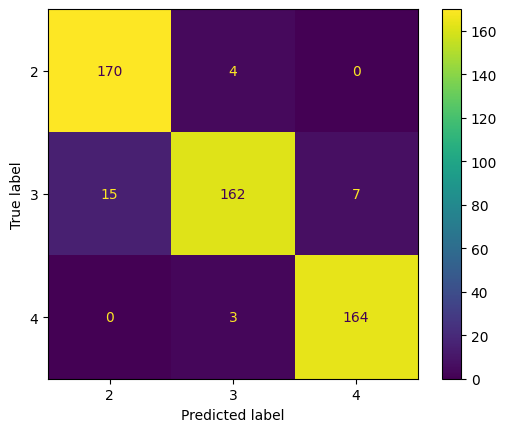

In [42]:
# Importing the necessary library for displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
dec_tree_classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(rand_for_class, X_test, y_test)
dec_tree_classifier_Confusion_Matrix

In [43]:
# displaying the classification report 
print(classification_report(y_test, rand_for_class_predict))

              precision    recall  f1-score   support

           2       0.92      0.98      0.95       174
           3       0.96      0.88      0.92       184
           4       0.96      0.98      0.97       167

    accuracy                           0.94       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.94      0.94       525



# <span style="background-color: #D32D41; padding: 5px;">6. Extra Tree (Random Forests) Classifier

In [44]:
# Importing the necessary libraries 
from sklearn.tree import ExtraTreeClassifier

# saving the model into the object variable
extra_tree_classfier = ExtraTreeClassifier()

In [45]:
# training the model with training data
extra_tree_classfier.fit(X_train, y_train)

ExtraTreeClassifier()

In [46]:
# predicting the model with testing data
extra_tree_classfier_predict = extra_tree_classfier.predict(X_test)
extra_tree_classfier_predict

array([3, 2, 3, 4, 4, 3, 4, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4,
       4, 3, 4, 2, 3, 4, 4, 3, 4, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 2, 4, 4,
       4, 2, 3, 2, 2, 2, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 2, 4, 3, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 3, 3, 2, 3, 2, 2, 4, 4, 2, 4, 2, 2, 3, 4, 4, 3, 2, 4, 3, 2,
       4, 2, 3, 3, 2, 4, 4, 4, 2, 2, 3, 2, 2, 4, 2, 4, 2, 2, 2, 4, 3, 4,
       2, 3, 2, 3, 4, 4, 3, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 3, 3, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 3, 2, 4,
       3, 4, 4, 2, 4, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 3, 4, 4, 2, 2, 3, 2,
       4, 2, 2, 4, 4, 4, 3, 3, 3, 3, 2, 2, 3, 2, 4, 2, 3, 3, 2, 2, 2, 4,
       2, 3, 2, 3, 4, 4, 3, 2, 4, 4, 4, 2, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4,
       3, 2, 4, 4, 2, 3, 4, 3, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3,
       3, 3, 2, 2, 4, 2, 4, 3, 4, 4, 3, 4, 4, 2, 2, 2, 2, 2, 4, 4, 3, 4,
       2, 3, 4, 4, 3, 2, 3, 4, 2, 2, 3, 3, 2, 3, 3,

### Model Evaluation

In [47]:
# importing the necessary library for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
extra_tree_classfier_acc_score = accuracy_score(y_test, extra_tree_classfier_predict)
extra_tree_classfier_acc_score

0.7295238095238096

In [48]:
# finding the training score of the model 
extra_tree_classfier_training_score = extra_tree_classfier.score(X_train, y_train)
extra_tree_classfier_training_score

1.0

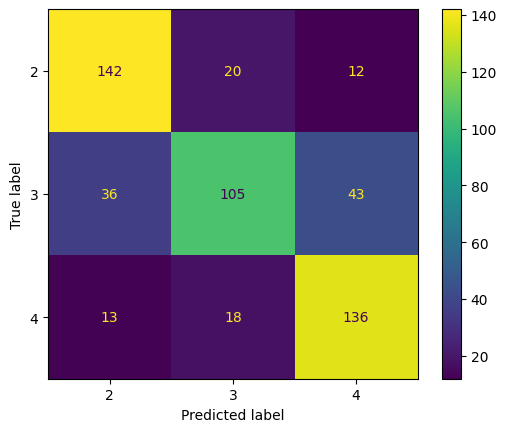

In [49]:
# importing the necessary library for displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
extra_tree_classfier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(extra_tree_classfier, X_test, y_test)
extra_tree_classfier_Confusion_Matrix

In [50]:
# # displaying the classification report of the model 
print(classification_report(y_test, extra_tree_classfier_predict))

              precision    recall  f1-score   support

           2       0.74      0.82      0.78       174
           3       0.73      0.57      0.64       184
           4       0.71      0.81      0.76       167

    accuracy                           0.73       525
   macro avg       0.73      0.73      0.73       525
weighted avg       0.73      0.73      0.72       525



# <span style="background-color: #D32D41; padding: 5px;">7. Naive Bayes Classification

In [51]:
# importing the necessary library 
from sklearn.naive_bayes import BernoulliNB

# saving the model into the object variable
naive_bayes_classifier = BernoulliNB()

In [52]:
# training the model with the training dataset
naive_bayes_classifier.fit(X_train, y_train)

BernoulliNB()

In [53]:
# predicting the model with test data
naive_bayes_classifier_prediction = naive_bayes_classifier.predict(X_test)
naive_bayes_classifier_prediction

array([4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 3, 4, 4, 4, 4, 2, 2, 2, 4, 4,
       4, 3, 4, 4, 3, 2, 4, 4, 4, 3, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 4, 3,
       3, 4, 3, 2, 2, 2, 3, 2, 4, 2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 2, 3, 4, 2, 4, 3, 4, 3, 2, 4, 4, 3, 2, 4, 2, 4, 3, 4, 3,
       4, 2, 3, 4, 4, 3, 2, 2, 3, 4, 2, 3, 4, 2, 2, 4, 4, 4, 2, 4, 2, 3,
       4, 2, 4, 2, 4, 2, 3, 4, 2, 2, 4, 2, 3, 3, 2, 4, 2, 2, 2, 3, 4, 3,
       2, 4, 2, 4, 4, 3, 4, 4, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 4, 4, 2, 3,
       3, 2, 4, 2, 4, 2, 3, 3, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 3, 2, 4,
       3, 2, 3, 3, 2, 3, 4, 3, 4, 3, 3, 2, 3, 2, 4, 3, 4, 4, 2, 2, 3, 2,
       3, 2, 2, 4, 4, 4, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4,
       3, 3, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 4, 4, 3, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 4, 2, 2, 3,
       4, 3, 2, 4, 2, 2, 3, 4, 3, 3, 4, 4, 3, 3, 4, 2, 2, 2, 3, 4, 3, 4,
       2, 3, 4, 4, 2, 3, 3, 4, 3, 4, 4, 3, 2, 3, 3,

### Model Evaluation

In [54]:
# importing the necessary library for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# check for the accuracy score of the model 
naive_bayes_classifier_acc_score = accuracy_score(y_test, naive_bayes_classifier_prediction)
naive_bayes_classifier_acc_score

0.7066666666666667

In [55]:
# checking the training score of the model 
naive_bayes_classifier_training_score = naive_bayes_classifier.score(X_train, y_train)
naive_bayes_classifier_training_score

0.7467811158798283

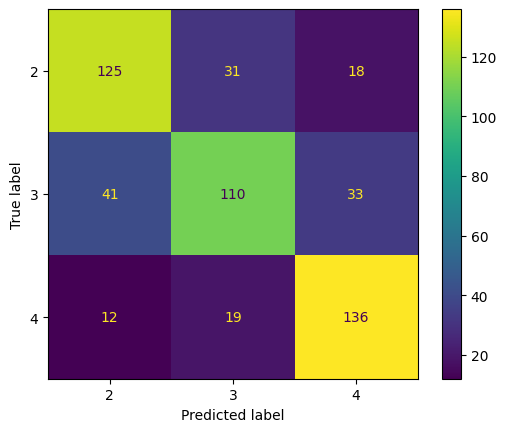

In [56]:
# imprting the necessary library for diplaying the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
naive_bayes_classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(naive_bayes_classifier, X_test, y_test)
naive_bayes_classifier_Confusion_Matrix

In [57]:
# diplaying the classification report of the model 
print(classification_report(y_test, naive_bayes_classifier_prediction))

              precision    recall  f1-score   support

           2       0.70      0.72      0.71       174
           3       0.69      0.60      0.64       184
           4       0.73      0.81      0.77       167

    accuracy                           0.71       525
   macro avg       0.71      0.71      0.71       525
weighted avg       0.71      0.71      0.70       525



# <span style="background-color: #D32D41; padding: 5px;">8. AdaBoost Classification

In [58]:
# importing the necessary library 
from sklearn.ensemble import AdaBoostClassifier

# saving the model into the object variable
adaboost_classifier = AdaBoostClassifier()

In [59]:
# training the model with training data
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [60]:
# predicting the model with testing data
adaboost_classifier_prediction = adaboost_classifier.predict(X_test)
adaboost_classifier_prediction

array([3, 2, 2, 4, 4, 4, 3, 2, 3, 4, 2, 2, 3, 4, 4, 4, 4, 3, 2, 2, 2, 4,
       4, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 4, 2, 4, 4,
       3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 4, 2, 3, 2, 4, 3, 3, 2, 4, 3, 2, 3, 3, 3, 2, 4, 2, 4, 3, 4, 3,
       4, 2, 3, 3, 4, 4, 2, 3, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 3, 3,
       4, 3, 4, 4, 3, 3, 4, 4, 2, 2, 3, 2, 2, 3, 3, 4, 2, 2, 2, 4, 3, 2,
       3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 2, 2, 2, 4, 4, 2, 3, 3, 4, 4, 4, 3,
       3, 2, 4, 2, 4, 3, 3, 3, 3, 4, 4, 2, 4, 4, 2, 4, 4, 4, 3, 3, 2, 4,
       3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3,
       2, 2, 2, 4, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 4, 2, 2, 2, 3, 4,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 4, 4, 3, 2, 3,
       3, 2, 4, 3, 2, 4, 4, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 4, 4, 4, 4, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4,
       2, 3, 4, 4, 4, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evaluation

In [61]:
# importing the necessary library for model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# check for the accuracy of the model 
adaboost_classifier_acc_score = accuracy_score(y_test, adaboost_classifier_prediction)
adaboost_classifier_acc_score

0.8057142857142857

In [62]:
# check for the training score of the model 
adaboost_classifier_training_score = adaboost_classifier.score(X_train, y_train)
adaboost_classifier_training_score

0.8245112064854554

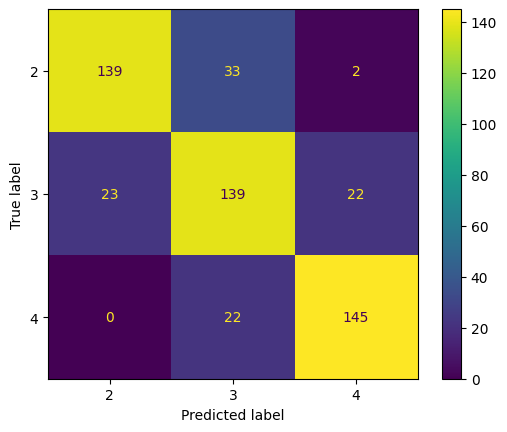

In [63]:
# Importing the necessary library for the displaying the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
adaboost_classifier_confusion_matrix = ConfusionMatrixDisplay.from_estimator(adaboost_classifier, X_test, y_test )
adaboost_classifier_confusion_matrix

In [64]:
# displaying the classification report of the model 
print(classification_report(y_test, adaboost_classifier_prediction))

              precision    recall  f1-score   support

           2       0.86      0.80      0.83       174
           3       0.72      0.76      0.74       184
           4       0.86      0.87      0.86       167

    accuracy                           0.81       525
   macro avg       0.81      0.81      0.81       525
weighted avg       0.81      0.81      0.81       525



# <span style="background-color: #D32D41; padding: 5px;">9. Gradient Descent Classification

In [65]:
# Importing the necessary library
from sklearn.ensemble import GradientBoostingClassifier

# saving the model to the object varibale
grad_des_classifier = GradientBoostingClassifier()

In [66]:
# training our model with training data
grad_des_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [67]:
# prediciting our model with our testing data
grad_des_classifier_prediction = grad_des_classifier.predict(X_test)
grad_des_classifier_prediction

array([3, 2, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 2, 2, 2, 4,
       4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4,
       4, 2, 3, 2, 2, 2, 2, 3, 4, 2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4,
       4, 4, 3, 2, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 3, 4, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 2, 3,
       4, 3, 4, 4, 3, 3, 4, 4, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 4, 3, 3, 4, 3, 4, 3, 3, 2, 4, 4, 2, 2, 3, 4, 4, 4, 3,
       2, 2, 4, 2, 4, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4,
       3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3,
       3, 2, 2, 4, 4, 4, 3, 3, 2, 2, 2, 4, 3, 3, 4, 2, 4, 3, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 2, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 2, 4, 3, 2, 3, 2, 2, 4, 3, 4, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 4, 3, 4,
       3, 3, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evalution

In [68]:
# importing the necessary library for model evaluation
from sklearn.metrics import accuracy_score, classification_report

# checking for the model accuracy score 
grad_des_classifier_acc_score = accuracy_score(y_test, grad_des_classifier_prediction)
grad_des_classifier_acc_score

0.9123809523809524

In [69]:
# checking for the model training score 
grad_des_classifier_training_score = grad_des_classifier.score(X_train, y_train)
grad_des_classifier_training_score

0.9871244635193133

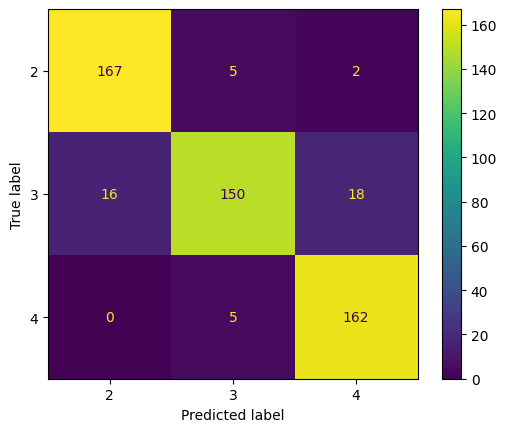

In [70]:
# importing the necessary library for displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
grad_des_classifier_confusion_matrix = ConfusionMatrixDisplay.from_estimator(grad_des_classifier, X_test, y_test)
grad_des_classifier_confusion_matrix

In [71]:
# displaying the classification report of the model
print(classification_report(y_test, grad_des_classifier_prediction))

              precision    recall  f1-score   support

           2       0.91      0.96      0.94       174
           3       0.94      0.82      0.87       184
           4       0.89      0.97      0.93       167

    accuracy                           0.91       525
   macro avg       0.91      0.92      0.91       525
weighted avg       0.91      0.91      0.91       525



# <span style="background-color: #D32D41; padding: 5px;">10. Stochastic Gradient Descent Classifier

In [72]:
# Importing the necessary library
from sklearn.linear_model import SGDClassifier

# saving the model in object variable
sgd_classifier = SGDClassifier()

In [73]:
# training the model with training data
sgd_classifier.fit(X_train, y_train)

SGDClassifier()

In [74]:
# predicting the model with testing data 
sgd_classifier_prediction = sgd_classifier.predict(X_test)
sgd_classifier_prediction

array([4, 3, 2, 4, 3, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 3, 2, 2, 3,
       4, 3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 3, 2, 3, 4, 2, 3, 2, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4,
       4, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 3, 4, 3, 2, 4, 2, 4, 3, 4, 3,
       4, 2, 3, 4, 4, 4, 2, 2, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 3, 2,
       4, 3, 4, 4, 3, 2, 4, 4, 2, 2, 4, 2, 3, 3, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 3, 2, 4, 4, 4, 3, 4, 3, 4, 2, 2, 2, 4, 3, 3, 2, 3, 4, 3, 2, 3,
       2, 2, 4, 2, 4, 3, 3, 3, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 2,
       3, 2, 4, 3, 3, 3, 4, 3, 2, 4, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 3, 3, 3, 4, 2, 4, 2, 2, 2, 3, 4,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 3, 2, 3,
       3, 2, 4, 3, 2, 4, 4, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 4, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 4, 3, 4,
       2, 3, 4, 4, 4, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3,

### Model Evaluation

In [75]:
# importing the necessary library for model accauracy 
from sklearn.metrics import accuracy_score, classification_report

# checking the model accuracy score
sgd_classifier_acc_score = accuracy_score(y_test, sgd_classifier_prediction)
sgd_classifier_acc_score

0.8114285714285714

In [76]:
# check for the training score of model 
sgd_classifier_training_score = sgd_classifier.score(X_train, y_train)
sgd_classifier_training_score

0.8001907486886027

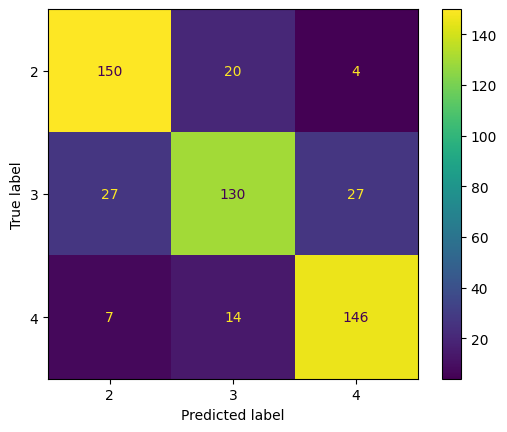

In [77]:
# importing the necessary library for diplaying the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
sgd_classifier_confusion_matrix = ConfusionMatrixDisplay.from_estimator(sgd_classifier, X_test, y_test)
sgd_classifier_confusion_matrix

In [78]:
# dispalying the classification report of the model 
print(classification_report(y_test, sgd_classifier_prediction))

              precision    recall  f1-score   support

           2       0.82      0.86      0.84       174
           3       0.79      0.71      0.75       184
           4       0.82      0.87      0.85       167

    accuracy                           0.81       525
   macro avg       0.81      0.81      0.81       525
weighted avg       0.81      0.81      0.81       525



# <span style="background-color: #D32D41; padding: 5px;">11. XGBOOST Classifier

In [79]:
# Importing the necessary library
from xgboost import XGBClassifier

# saving the model in object variable
xgb_classifier = XGBClassifier()

In [80]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_labeled = pd.DataFrame(encoder.fit_transform(y_sm))

In [81]:
y_labeled.value_counts()

0    874
1    874
2    874
Name: count, dtype: int64

In [82]:
# importing train test split for traning and testing the data
from sklearn.model_selection import train_test_split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_sm, y_labeled, test_size=0.2,random_state=56)

In [83]:
# training the model with training data
xgb_classifier.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [84]:
# predicting the model with testing data 
xgb_classifier_prediction = xgb_classifier.predict(X_test_xgb)
xgb_classifier_prediction

array([1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0,
       0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1,

### Model Evaluation

In [85]:
# importing the necessary library for model accauracy 
from sklearn.metrics import accuracy_score, classification_report

# checking the model accuracy score
xgb_classifier_acc_score = accuracy_score(y_test_xgb, xgb_classifier_prediction)
xgb_classifier_acc_score

0.9295238095238095

In [86]:
# check for the training score of model 
xgb_classifier_training_score = xgb_classifier.score(X_train_xgb, y_train)
xgb_classifier_training_score

0.0

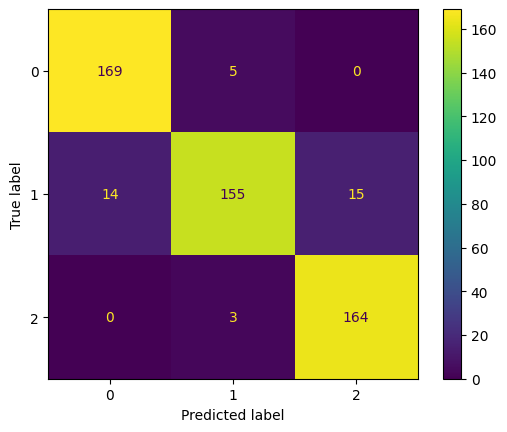

In [87]:
# importing the necessary library for diplaying the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
xgb_classifier_confusion_matrix = ConfusionMatrixDisplay.from_estimator(xgb_classifier, X_test_xgb, y_test_xgb)
xgb_classifier_confusion_matrix

In [88]:
# dispalying the classification report of the model 
print(classification_report(y_test_xgb, xgb_classifier_prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       174
           1       0.95      0.84      0.89       184
           2       0.92      0.98      0.95       167

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [89]:
# summarising the different model with their respective model accuaracy 
from tabulate import tabulate
my_data = [['Logistic Regression', logistic_reg_acc_Score, logistic_reg_training_score],
           ["Decision Tree Classification", dec_tree_classifier_acc_score, dec_tree_classifier_training_score],
           ["Extra Tree (Random Forests) Classifier", extra_tree_classfier_acc_score, extra_tree_classfier_training_score],
           ["Random Forest Classification", rand_for_class_acc_score, rand_for_class_training_score],
           ["Support Vector Machine Classification", svm_classifier_acc_score, svm_classifier_training_score],
           ["Naive Bayes Classification", naive_bayes_classifier_acc_score, naive_bayes_classifier_training_score],
           ["K-Neighbour Classification", k_neigh_classifier_acc_Score, k_neigh_classifier_training_score],
           ["Adaboost Classification", adaboost_classifier_acc_score, adaboost_classifier_training_score],
           ["Gradient Descent Classification", grad_des_classifier_acc_score, grad_des_classifier_training_score],
           ["Stochastic Gradient Descent Classifier", sgd_classifier_acc_score, sgd_classifier_training_score],
           ["XGBOOST Classifier", xgb_classifier_acc_score, xgb_classifier_training_score]
          ]
head = ["Model Name", "Testing Accuracy",  "Training Score"]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+----------------------------------------+--------------------+------------------+
| Model Name                             |   Testing Accuracy |   Training Score |
+========================================+====================+==================+
| Logistic Regression                    |           0.822857 |         0.834049 |
+----------------------------------------+--------------------+------------------+
| Decision Tree Classification           |           0.792381 |         1        |
+----------------------------------------+--------------------+------------------+
| Extra Tree (Random Forests) Classifier |           0.729524 |         1        |
+----------------------------------------+--------------------+------------------+
| Random Forest Classification           |           0.944762 |         1        |
+----------------------------------------+--------------------+------------------+
| Support Vector Machine Classification  |           0.937143 |         0.975203 |
+---

# HYPER PARAMETER TUNING

- **Hyperparameter tuning is the process of finding the best values for the hyperparameters of a machine learning model. Hyperparameters are the parameters that are not learned by the model during training. They are set by the user and can have a significant impact on the performance of the model.**

- **The goal of hyperparameter tuning is to find the set of hyperparameters that results in the best model performance on a given dataset. This can be done manually or using automated methods.**

# <span style="background-color: #D32D41; padding: 5px;">1. Random Forest Classification Hyper ParaMeter tuning

In [90]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

In [91]:
# instantiating random forest regressor
random_for_hyp_tuning = RandomForestClassifier()

In [92]:
# selecting different parameter
params = {
    "n_estimators" : [90,100,115,130, 150, 170, 200, 220, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2', 'sqrt']
}

In [93]:
# Initiating the hyperparamter tuning
rand_for_searchCV = RandomizedSearchCV(random_for_hyp_tuning, params,verbose=2, n_iter=10, cv = 5, n_jobs = -1)

In [94]:
tqdm(rand_for_searchCV.fit(X_train, y_train), desc="RandomizedSearchCV Progress", total=10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV Progress:   0%|                                                              | 0/10 [00:00<?, ?it/s]

In [95]:
best_estimator = rand_for_searchCV.best_estimator_

In [96]:
# Get the best hyperparameters
best_parameters= rand_for_searchCV.best_params_
best_parameters

{'n_estimators': 150,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy'}

In [97]:
# Best model accuracy 
rand_for_hyp_score = rand_for_searchCV.score(X_test, y_test)
rand_for_hyp_score

0.9047619047619048

In [98]:
# training our model with best parameter to check how our model has performed
rand_for_best_para = RandomForestClassifier(n_estimators = 130, min_samples_split = 8,
                                         min_samples_leaf = 2, max_features =  'log2',
                                          max_depth = 18, criterion = 'entropy')

In [99]:
rand_for_best_para.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, max_features='log2',
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=130)

In [100]:
# checking the predicted values 
rand_best_para_pred = rand_for_best_para.predict(X_test)

In [101]:
# checking the accuaracy score
rand_best_para_acc = accuracy_score(y_test, rand_best_para_pred)
rand_best_para_acc

0.9161904761904762

# <span style="background-color: #D32D41; padding: 5px;">2. XGBOOST Classifier Hyper Parameter Tuning

In [102]:
# Importing the necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [103]:
# instantiating XGBOOSTING classifier
XGBOOST_hyp_tuning = XGBClassifier()

In [104]:
# selecting different parameter
param_grid = {'gamma': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
             }

In [105]:
# Initialize RandomizedSearchCV for hyperparameter tuning
XGB_searchCV = RandomizedSearchCV(estimator=XGBOOST_hyp_tuning, scoring='f1_weighted', param_distributions=param_grid, n_iter=10, cv=5,verbose=2, random_state=42, n_jobs=-1)


In [106]:
# training the randomises searchCV 
XGB_searchCV.fit(X_train_xgb, y_train_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  6.4, 12.8, 25.6, 51.2, 102.4,
                                                  200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25, 0.4,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [107]:
# Get the best estimator
best_estimator = XGB_searchCV.best_estimator_
best_estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=65, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [108]:
# Get the best hyperparameters
best_parameters= XGB_searchCV.best_params_
best_parameters

{'reg_lambda': 0.2,
 'reg_alpha': 3.2,
 'n_estimators': 65,
 'max_depth': 8,
 'learning_rate': 0.6,
 'gamma': 0.1}

In [109]:
xgb_class_best_param = XGBClassifier(reg_lambda = 51.2,
                                     reg_alpha = 6.4,
                                     n_estimators = 50,
                                     max_depth = 14,
                                     learning_rate = 0.7,
                                     gamma = 0.2)

In [110]:
xgb_class_best_param.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [111]:
# predicting the model with testing data 
xgb_class_best_param_pred = xgb_class_best_param.predict(X_test)
xgb_class_best_param_pred

array([1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1,

In [112]:
xgb_class_best_param_acc_score = accuracy_score(y_test_xgb, xgb_class_best_param_pred)
xgb_class_best_param_acc_score

0.9047619047619048

# <span style="background-color: #D32D41; padding: 5px;">3. LogisticRegression Hyperparameter Tuning

In [113]:
# importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [114]:
param = {
    "penalty" : ['l2'], # L1 or L2 (Regularization penality)
    "C"       : list(np.logspace(-3, 3, 7)), # Inverse of regularization strength
    'solver'  : ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300]
}

In [115]:
# saving the model
logistic_reg_hyp = LogisticRegression()

In [116]:
logistic_reg_seachCV = RandomizedSearchCV(
                estimator  =logistic_reg_hyp,
                param_distributions = param,
                scoring    ='accuracy',
                n_iter     =100,
                cv         =10,
                verbose    =2,
                n_jobs     =-1,
                error_score='raise'
)

In [117]:
# training the model with traning the model with traning dataset
logistic_reg_seachCV.fit(X_train,y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


RandomizedSearchCV(cv=10, error_score='raise', estimator=LogisticRegression(),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs', 'saga',
                                                   'newton-cg']},
                   scoring='accuracy', verbose=2)

In [118]:
# Get the best hyperparameters
best_parameters= logistic_reg_seachCV.best_params_
best_parameters

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0}

In [119]:
# dchecking the predicted values 
logistic_best_param_pred = logistic_reg_seachCV.predict(X_test)
logistic_best_param_pred

array([3, 2, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 3, 3, 2, 2, 4,
       4, 3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 3, 2, 2, 4, 2, 3, 2, 4, 2, 4, 4,
       4, 2, 3, 2, 2, 2, 2, 2, 4, 2, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 3,
       4, 2, 3, 4, 4, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 4, 4, 4, 2, 4, 3, 2,
       4, 3, 4, 4, 3, 3, 4, 4, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 4, 2, 4, 4, 4, 4, 4, 3, 4, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 2, 3,
       2, 2, 4, 2, 4, 3, 3, 3, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 2,
       3, 2, 4, 3, 3, 3, 4, 3, 2, 4, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 2, 4, 3, 4, 3, 3, 2, 2, 2, 4, 3, 3, 4, 4, 4, 2, 2, 2, 2, 4,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 4, 3, 2, 4, 2, 3, 4, 2, 4, 4, 2, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 2, 3, 3, 2, 3, 3, 4, 3, 2, 2, 4, 4, 2, 2, 3,
       2, 2, 2, 2, 3, 4, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 4, 3, 4,
       2, 3, 4, 4, 4, 2, 3, 3, 2, 4, 4, 3, 2, 2, 3,

In [120]:
# checking the accuracy score 
logistic_best_param_acc_score = accuracy_score(y_test, logistic_best_param_pred)
logistic_best_param_acc_score

0.8342857142857143

# <span style="background-color: #D32D41; padding: 5px;">4. AdaBoost Classifier Hyper Parameter Tuning

In [121]:
# importing the necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [122]:
# Create a base decision tree classifier
base_estimator = DecisionTreeClassifier()

# Initialize AdaBoostClassifier with the base estimator
adaboost_class_hyp_tun = AdaBoostClassifier(base_estimator=base_estimator)


In [123]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],       # Number of base estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],    # Learning rate for weight adjustment
    'base_estimator__max_depth': [1, 2, 3],    # Maximum depth of base decision tree
}


In [124]:
# Initialize RandomizedSearchCV for hyperparameter tuning
adaboost_searchCV = RandomizedSearchCV(
    estimator            =adaboost_class_hyp_tun,      # Base model
    param_distributions  =param_grid,# Hyperparameter grid for search
    scoring              ='accuracy',    # Scoring metric for evaluation
    n_iter               =10,           # Number of random combinations to try
    cv                   =10,             # Number of cross-validation folds
    verbose              =2,             # Verbosity level for output
    random_state         =42,            # Random seed for reproducibility
    n_jobs               =-1             # Number of CPU cores to use for parallel processing
)

In [125]:
adaboost_searchCV.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [1, 2, 3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [126]:
# Get the best hyperparameters
adaboost_class_best_param = adaboost_searchCV.best_params_
adaboost_class_best_param

{'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator__max_depth': 3}

In [127]:
# Best model accuracy 
adaboost_class_hyp_score = adaboost_searchCV.score(X_test, y_test)
adaboost_class_hyp_score

0.8628571428571429

# <span style="background-color: #D32D41; padding: 5px;">5. Decision Tree Classifier Hyper Parameter Tuning

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [129]:
dec_tree_classifier_hyp_tuning = DecisionTreeClassifier()

In [130]:
params = {
    "criterion"        :("gini", "entropy"),  #quality of split
    "splitter"         :("best", "random"),   # searches the features for a split
    "max_depth"        :(list(range(1, 50))), #depth of tree range 1 to 19
    "min_samples_split":[2, 3, 4],            #the minimum number of samples required to split internal node
    "min_samples_leaf" :list(range(1, 20)),   #minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
    
}

In [131]:
des_tree_searchCV = RandomizedSearchCV(estimator=dec_tree_classifier_hyp_tuning, param_distributions=params, scoring="f1_micro", n_iter=100, n_jobs=-1, verbose=2, cv=5, random_state=42)

In [132]:
des_tree_searchCV.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   random_state=42, scoring='f1_micro', verbose=2)

In [133]:
des_tree_searchCV.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 25,
 'criterion': 'entropy'}

In [134]:
des_tree_searchCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25)

In [135]:
des_tree_searchCV.best_score_

0.7982850323900444

In [136]:
des_tree_class_best_param = DecisionTreeClassifier(splitter =  'random',
                                                  min_samples_split = 3,
                                                  min_samples_leaf = 1,
                                                  max_depth =  21,
                                                  criterion =  'entropy')

In [137]:
des_tree_class_best_param.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_split=3,
                       splitter='random')

In [138]:
des_tree_class_best_param_pred = des_tree_class_best_param.predict(X_test)
des_tree_class_best_param_pred 

array([4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 4,
       4, 3, 4, 3, 3, 2, 4, 2, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 4, 2, 4, 3,
       4, 3, 3, 2, 3, 2, 3, 2, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 3, 4,
       3, 4, 3, 3, 2, 4, 2, 2, 2, 4, 3, 2, 3, 4, 3, 2, 4, 2, 4, 3, 4, 3,
       4, 2, 3, 2, 4, 3, 2, 2, 3, 4, 3, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 3,
       4, 2, 3, 4, 3, 3, 4, 4, 2, 2, 4, 2, 2, 3, 3, 4, 2, 3, 2, 4, 2, 2,
       2, 3, 2, 4, 2, 4, 3, 4, 2, 4, 3, 3, 2, 4, 4, 3, 2, 4, 4, 4, 2, 4,
       2, 2, 3, 2, 4, 3, 3, 3, 4, 4, 2, 2, 4, 4, 3, 4, 4, 4, 2, 3, 2, 4,
       3, 2, 4, 2, 4, 3, 4, 3, 2, 3, 3, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3,
       2, 2, 2, 4, 4, 4, 2, 3, 3, 4, 2, 3, 3, 2, 4, 2, 4, 3, 2, 2, 2, 3,
       3, 4, 2, 3, 3, 4, 2, 2, 4, 4, 3, 2, 4, 3, 3, 2, 2, 4, 4, 2, 2, 3,
       2, 2, 4, 3, 2, 4, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 2, 4, 3, 3, 3, 3,
       2, 3, 2, 2, 4, 3, 3, 4, 4, 4, 3, 4, 4, 2, 2, 2, 2, 3, 3, 4, 2, 4,
       3, 3, 4, 3, 4, 2, 2, 2, 2, 2, 4, 3, 2, 4, 3,

In [139]:
des_tree_class_best_param_acc = accuracy_score(y_test, des_tree_class_best_param_pred)
des_tree_class_best_param_acc

0.7676190476190476

In [140]:
# summarising the different model with their respective model accuaracy 
from tabulate import tabulate
my_data = [['Logistic Regression', logistic_reg_acc_Score, logistic_reg_training_score],
           ["Decision Tree Classification", dec_tree_classifier_acc_score, dec_tree_classifier_training_score],
           ["Extra Tree (Random Forests) Classifier", extra_tree_classfier_acc_score, extra_tree_classfier_training_score],
           ["Random Forest Classification", rand_for_class_acc_score, rand_for_class_training_score],
           ["Support Vector Machine Classification", svm_classifier_acc_score, svm_classifier_training_score],
           ["Naive Bayes Classification", naive_bayes_classifier_acc_score, naive_bayes_classifier_training_score],
           ["K-Neighbour Classification", k_neigh_classifier_acc_Score, k_neigh_classifier_training_score],
           ["Adaboost Classification", adaboost_classifier_acc_score, adaboost_classifier_training_score],
           ["Gradient Descent Classification", grad_des_classifier_acc_score, grad_des_classifier_training_score],
           ["Stochastic Gradient Descent Classifier", sgd_classifier_acc_score, sgd_classifier_training_score],
           ["XGBOOST Classifier", xgb_classifier_acc_score, xgb_classifier_training_score]
          ]
head = ["Model Name", "Testing Accuracy",  "Training Score"]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+----------------------------------------+--------------------+------------------+
| Model Name                             |   Testing Accuracy |   Training Score |
+========================================+====================+==================+
| Logistic Regression                    |           0.822857 |         0.834049 |
+----------------------------------------+--------------------+------------------+
| Decision Tree Classification           |           0.792381 |         1        |
+----------------------------------------+--------------------+------------------+
| Extra Tree (Random Forests) Classifier |           0.729524 |         1        |
+----------------------------------------+--------------------+------------------+
| Random Forest Classification           |           0.944762 |         1        |
+----------------------------------------+--------------------+------------------+
| Support Vector Machine Classification  |           0.937143 |         0.975203 |
+---

In [141]:
# summarising the different model with their respective model accuaracy 
from tabulate import tabulate
my_data = [['Random Forest Classification', rand_best_para_acc],
           ["Decision Tree Classification", des_tree_class_best_param_acc],
           ['Logistic Regression', logistic_best_param_acc_score],
           ["Adaboost Classification", adaboost_class_hyp_score],
           ["XGBOOST Classifier", xgb_class_best_param_acc_score],
          ]
head = ["Model Name", "Testing Accuracy"]
print(tabulate(my_data, headers=head, tablefmt="grid"))

+------------------------------+--------------------+
| Model Name                   |   Testing Accuracy |
+==============================+====================+
| Random Forest Classification |           0.91619  |
+------------------------------+--------------------+
| Decision Tree Classification |           0.767619 |
+------------------------------+--------------------+
| Logistic Regression          |           0.834286 |
+------------------------------+--------------------+
| Adaboost Classification      |           0.862857 |
+------------------------------+--------------------+
| XGBOOST Classifier           |           0.904762 |
+------------------------------+--------------------+


- The problem dataset is classified by three models: xgboost classifier, support vector machine classifier, and random forest classifier.
- The average accuracy score of these models is 94%, which indicates a high performance in predicting the values.
- However, there is a possibility of overfitting, which means the models may not generalize well to new data.
- To address this issue, hyperparameter tuning is applied to each model to optimize their parameters and reduce overfitting.
- After hyperparameter tuning, the random forest classifier has the highest accuracy score of 92%, followed by the xgboost classifier with 91%.
- The accuracy scores are still satisfactory, but there is room for improvement by exploring other models, such as artificial neural networks (ANN).

# Artificial Neural Network

In [142]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [143]:
# training the model with dense layers using ANN
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = 22))
model.add(Dense(64, activation = 'relu',))
model.add(Dense(28, activation = 'relu',))
model.add(Dense(3, activation='softmax'))

In [144]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 dense_3 (Dense)             (None, 3)                 87        
                                                                 
Total params: 13,107
Trainable params: 13,107
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [146]:
history = model.fit(X_train_xgb, y_train_xgb, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/50
59/59 - 3s - loss: 0.7695 - accuracy: 0.6789 - val_loss: 0.4503 - val_accuracy: 0.8667 - 3s/epoch - 58ms/step
Epoch 2/50
59/59 - 0s - loss: 0.3772 - accuracy: 0.8649 - val_loss: 0.3598 - val_accuracy: 0.8762 - 181ms/epoch - 3ms/step
Epoch 3/50
59/59 - 0s - loss: 0.2907 - accuracy: 0.8972 - val_loss: 0.3159 - val_accuracy: 0.8857 - 170ms/epoch - 3ms/step
Epoch 4/50
59/59 - 0s - loss: 0.2386 - accuracy: 0.9179 - val_loss: 0.3008 - val_accuracy: 0.9095 - 178ms/epoch - 3ms/step
Epoch 5/50
59/59 - 0s - loss: 0.1875 - accuracy: 0.9406 - val_loss: 0.2772 - val_accuracy: 0.9048 - 173ms/epoch - 3ms/step
Epoch 6/50
59/59 - 0s - loss: 0.1484 - accuracy: 0.9565 - val_loss: 0.2698 - val_accuracy: 0.8952 - 171ms/epoch - 3ms/step
Epoch 7/50
59/59 - 0s - loss: 0.1215 - accuracy: 0.9698 - val_loss: 0.2602 - val_accuracy: 0.8952 - 168ms/epoch - 3ms/step
Epoch 8/50
59/59 - 0s - loss: 0.0988 - accuracy: 0.9746 - val_loss: 0.2593 - val_accuracy: 0.9048 - 173ms/epoch - 3ms/step
Epoch 9/50
59/59 -

In [147]:
y_pred_ann = model.predict(X_test_xgb)

17/17 [==============================] - 0s 2ms/step


In [148]:
y_pred_labels = np.argmax(y_pred_ann, axis=1)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_xgb, y_pred_labels)

0.9485714285714286

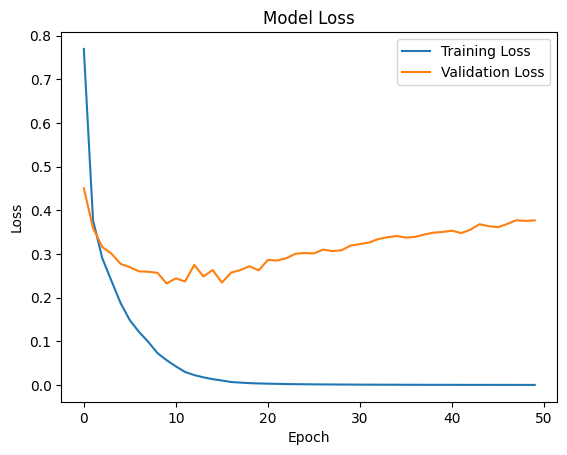

In [150]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  
plt.show()

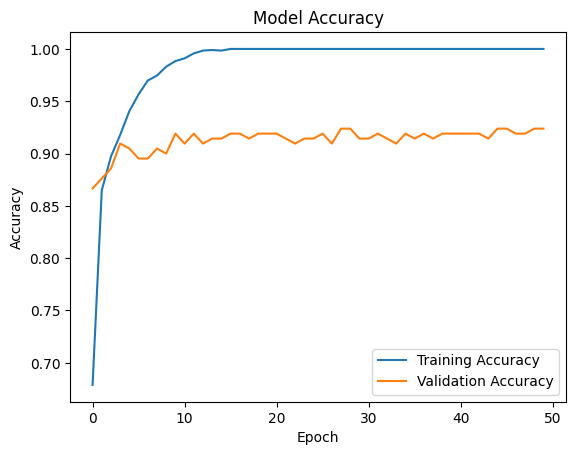

In [151]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # This will use the labels provided in the 'label' argument above
plt.show()

- After applying an artificial neural network (ANN) model to the problem statement dataset, we can achieve better accuracies than the other classification models used previously.
- With the ANN model, I can achieve up to 95% of accuracy score, which can be considered as suitable for production-grade use case model.
- The ANN model is a powerful and flexible tool for solving complex and nonlinear problems in various domains.

In [152]:
# saving the random forest classifier model
import joblib
joblib.dump(rand_for_best_para, '../../data/random_for_class_hyp.joblib')

['../../data/random_for_class_hyp.joblib']

In [153]:
joblib.dump(xgb_class_best_param, '../../data/xgb_class_hyp.joblib')

['../../data/xgb_class_hyp.joblib']

In [154]:
import pickle

# Assuming rand_for_best_para is your RandomForest model
with open('../../data/random_for_class_hyp.pickle', 'wb') as file:
    pickle.dump(rand_for_best_para, file)